Gene Expression Data Visualization and Analysis

Overview:
This notebook visualizes the distribution of the mean expression ratio of genes from single-cell RNA sequencing (scRNA-seq) data. The goal is to analyze the distribution and determine whether a log transformation is needed to clean and normalize the data.

The workflow involves:

1. Loading the previously computed gene statistics from a CSV file.
2. Plotting histograms of the mean gene expression ratio.
3. Applying a log transformation to the data if needed.
4. Visualizing the log-transformed distribution to check for normalization.

In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the gene statistics CSV file generated from the 'preprocess' script
# Assuming the file contains 'Gene', 'Sum', 'Mean', 'Variance' columns
gene_stats = pd.read_csv("C3N-03188_1_gene_statistics.csv")

In [19]:
# Function to plot histogram with log-scaled x-axis and custom binning
def plot_histogram_with_custom_bins(data, column_name, bins=None, xlim=None):
    """
    Plots a histogram with custom bins and optionally applies log scale to the x-axis.
    
    Parameters:
    - data: DataFrame, the gene statistics data
    - column_name: str, the column name to plot (e.g., 'Mean' or 'Variance')
    - bins: array-like, custom bin edges
    - xlim: tuple, the x-axis limits
    """
    plt.figure(figsize=(10, 6))

    # Plot histogram with custom bins
    plt.hist(data[column_name], bins=bins, color='lightcoral', edgecolor='black')
    plt.title(f"Histogram of {column_name} (Log-Scaled X-Axis)")
    plt.xlabel(f"{column_name} Expression Value")
    plt.ylabel("Frequency")

    # Apply log scale to the x-axis
    plt.xscale('log')

    # Optionally set x-axis limits
    if xlim:
        plt.xlim(xlim)

    plt.grid(True)
    plt.show()

In [20]:
# Create custom bins for the small values
custom_bins = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# Set x-axis limits to zoom into a specific range (optional)
x_axis_limits = (1e-6, 1e-2)

Histogram for Mean Expression Ratio (Log-Scaled X-Axis with Custom Bins):


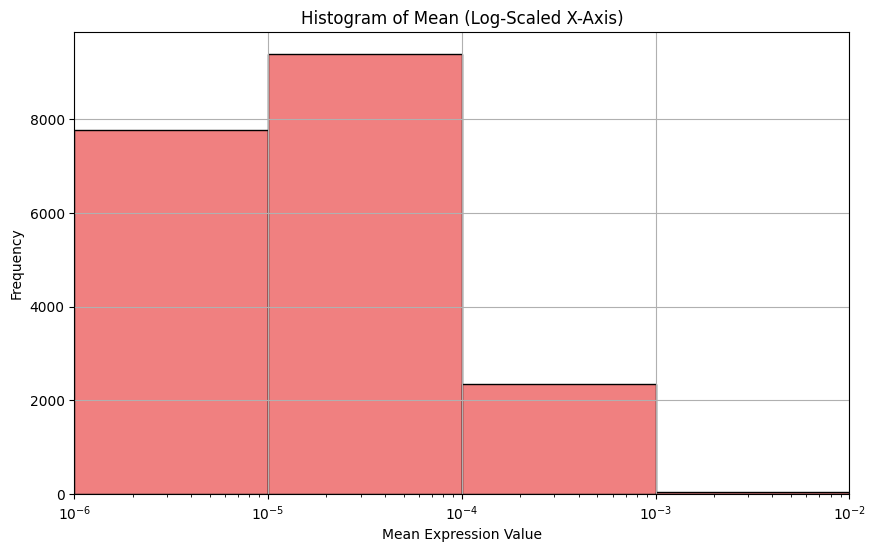

In [21]:
# Plot histograms for mean expression ratio with log-scaled x-axis and custom bins
print("Histogram for Mean Expression Ratio (Log-Scaled X-Axis with Custom Bins):")
plot_histogram_with_custom_bins(gene_stats, 'Mean', bins=custom_bins, xlim=x_axis_limits)

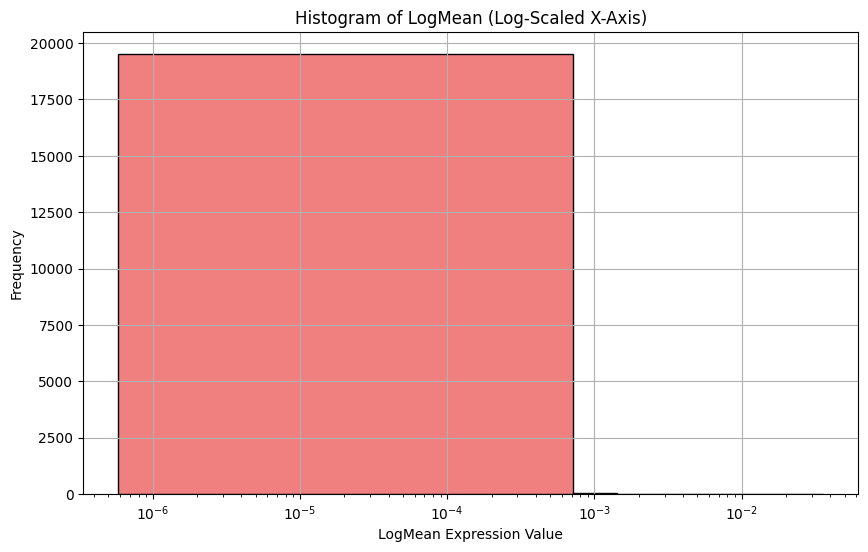

In [23]:
# Apply log transformation to the mean expression values
gene_stats['LogMean'] = np.log1p(gene_stats['Mean'])  # log(1 + x) to avoid log(0)

# Plot histogram of log-transformed mean expression values
plot_histogram_with_custom_bins(gene_stats, 'LogMean', bins=50, xlim=None)

In this case, where the majority of mean expression values are already small, and the range of values is relatively narrow, log transformation isn't as beneficial because:
- It does not significantly change the shape of the distribution.
- The original (non-log-transformed) data with the log-scaled x-axis provides a clearer and more interpretable picture of the data's spread.